<a href="https://colab.research.google.com/github/krishnadixit05/Google-Colab/blob/main/Lab_2(Hypothesis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab-2 Linear Regrassion


In [ ]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#1. Read the dataset
dataset=pd.read_csv("/content/train (1).csv")
dataset

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [ ]:
dataset.shape

(700, 2)

In [ ]:
dataset.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [ ]:
x_value=dataset.iloc[0:700,0:1]
y_value=dataset.iloc[0:700,1:2]

<Axes: >

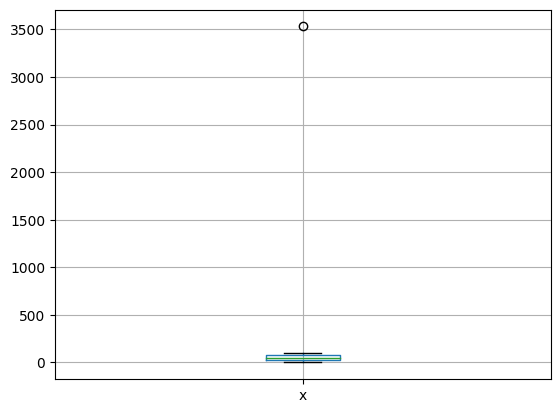

In [ ]:
x_value.boxplot(column=['x'])

<Axes: >

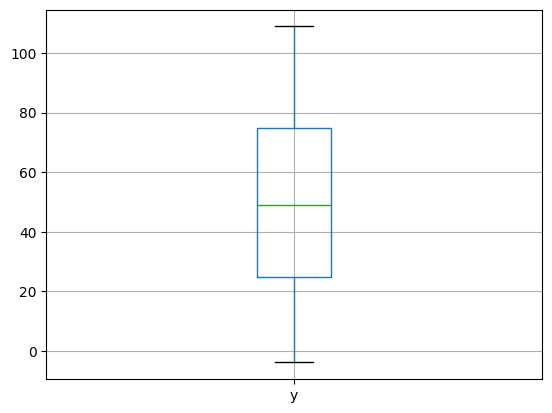

In [ ]:
y_value.boxplot(column=['y'])

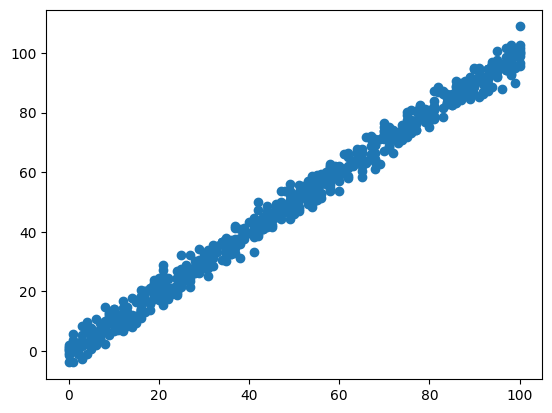

In [ ]:
plt.scatter(x_value,y_value)

In [ ]:
#cleaning the dataset
clean_dataset=dataset.dropna()

In [ ]:
clean_dataset.shape

(699, 2)

In [ ]:
x_feature=clean_dataset['x']
y_feature=clean_dataset['y']

In [ ]:
#ML Model
def hypothesis(theta_array,x):
  return (theta_array[0] + theta_array[1]*x_value)

In [ ]:
def costfunction(theta_array,x,y,m):
  total_cost = 0
  for i in range(m):
    total_cost+=((theta_array[0]+theta_array[1]*x[i])-y[i])**2
  return total_cost/(2*m)

In [ ]:
def gradient_descent(theta_array,x,y,m,alpha):
  summation_0=0
  summation_1=0
  for i in range(m):
    summation_0+=((theta_array[0]+ theta_array[1]*x[i])-y[i])
    summation_1+=(((theta_array[0]+ theta_array[1]*x[i])-y[i])*x[i])

  new_theta0=theta_array[0] -(summation_0*alpha/m)
  new_theta1=theta_array[1] -(summation_1*alpha/m)
  improvised_theta=[new_theta0,new_theta1]
  #print(improvised_theta)
  return improvised_theta

In [ ]:
def training(x, y, alpha, epochs):
  theta_0=0
  theta_1=0
  m=x.size
  cost_values=[]
  theta_array=[theta_0,theta_1]
  for i in range(epochs):
    theta_array=gradient_descent(theta_array,x,y,m,alpha)
    loss=costfunction(theta_array,x, y, m)
    cost_values.append(loss)
    y_new=theta_array[0]+theta_array[1]*x
    plt.scatter(x,y)
    plt.plot(x,y_new,'r')
    plt.show()

  x=np.arange(epochs)
  plt.plot(x,cost_values)
  plt.show()


In [ ]:
alpha=0.0001
epochs=100

In [ ]:
type(x_feature)

pandas.core.series.Series

In [ ]:
x_feature=x_feature.values.reshape(x_feature.size)
y_feature=y_feature.values.reshape(y_feature.size)

training(x_feature,y_feature,alpha,epochs)